# Example

Consider sequences that are increasingly different. EDeN allows to turn them into vectors, whose similarity is decreasing.

In [12]:
%matplotlib inline

Build an artificial dataset: starting from the string 'abcdefghijklmnopqrstuvwxyz', generate iteratively strings by swapping two characters at random. In this way instances are progressively more dissimilar

In [13]:
import random

def make_data(size):
    text = ''.join([str(unichr(97+i)) for i in range(26)])
    seqs = []

    def swap_two_characters(seq):
        '''define a function that swaps two characters at random positions in a string '''
        line = list(seq)
        id_i = random.randint(0,len(line)-1)
        id_j = random.randint(0,len(line)-1)
        line[id_i], line[id_j] = line[id_j], line[id_i]
        return ''.join(line)

    for i in range(size):
        text = swap_two_characters( text )
        seqs.append( text )
        print text
        
    return seqs

In [14]:
seqs = make_data(25)

mbcdefghijklanopqrstuvwxyz
mbcdefghijklanopqrstuvwxyz
mbcdxfghijklanopqrstuvweyz
mbcdxfghijklanopqustrvweyz
mbcdxpghijklanofqustrvweyz
mbcdxpghijklanofqwstrvueyz
mbcdxpghijylanofqwstrvuekz
mbcdxighpjylanofqwstrvuekz
mbcdrighpjylanofqwstxvuekz
mfcdrighpjylanobqwstxvuekz
mfcorighpjylandbqwstxvuekz
mkcorighpjylandbqwstxvuefz
mbcorighpjylandkqwstxvuefz
mbclrighpjyoandkqwstxvuefz
mbclrighpjyoandkqtswxvuefz
mbclrughpjyoandkqtswxviefz
mbclrughpjyoendkqtswxviafz
mbclruphgjyoendkqtswxviafz
mnclruphgjyoebdkqtswxviafz
fnclruphgjyoebdkqtswxviamz
fnclguphrjyoebdkqtswxviamz
fnclguphrjyoebdkqtswxviamz
fnclguphrjyoxbdkqtsweviamz
fnclguporjyhxbdkqtsweviamz
fnclguporjyxhbdkqtsweviamz


define a function that builds a graph from a string, i.e. the path graph with the characters as node labels

In [15]:
import networkx as nx

def sequence_to_graph(seq):
    '''convert a sequence into a EDeN 'compatible' graph
    i.e. a graph with the attribute 'label' for every node and edge'''
    G = nx.Graph()
    for id,character in enumerate(seq):
        G.add_node(id, label = character )
        if id > 0:
            G.add_edge(id-1, id, label = '-')
    return G

make a generator that yields graphs: generators are 'good' as they allow functional composition

In [16]:
def pre_process(iterable):
    for seq in iterable:
        yield sequence_to_graph(seq)

initialize the vectorizer object with the desired 'resolution'

In [17]:
%%time
from eden.graph import Vectorizer
vectorizer = Vectorizer(complexity=3, nbits=18)

CPU times: user 61 µs, sys: 3 µs, total: 64 µs
Wall time: 68.9 µs


obtain an iterator over the sequences processed into graphs

In [18]:
%%time
graphs = pre_process(seqs)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11 µs


compute the vector encoding of each instance in a sparse data matrix

In [19]:
%%time
X = vectorizer.transform(graphs)
print 'Instances: %d ; Features: %d with an avg of %d features per instance' % (X.shape[0], X.shape[1],  X.getnnz()/X.shape[0])

Instances: 25 ; Features: 262145 with an avg of 807 features per instance
CPU times: user 172 ms, sys: 11.9 ms, total: 184 ms
Wall time: 177 ms


compute the pairwise similarity as the dot product between the vector representations of each sequence

In [20]:
from sklearn import metrics

K=metrics.pairwise.pairwise_kernels(X, metric='linear')
print K

[[ 1.          1.          0.68054702  0.48313516  0.37553094  0.36889064
   0.25051122  0.23118755  0.23245179  0.19986861  0.18329704  0.18406955
   0.1983674   0.1893902   0.18791766  0.19042995  0.18134808  0.18126651
   0.16560336  0.15705386  0.15989949  0.15989949  0.16014172  0.16000326
   0.161244  ]
 [ 1.          1.          0.68054702  0.48313516  0.37553094  0.36889064
   0.25051122  0.23118755  0.23245179  0.19986861  0.18329704  0.18406955
   0.1983674   0.1893902   0.18791766  0.19042995  0.18134808  0.18126651
   0.16560336  0.15705386  0.15989949  0.15989949  0.16014172  0.16000326
   0.161244  ]
 [ 0.68054702  0.68054702  1.          0.71548895  0.46064727  0.41313716
   0.28437418  0.26503889  0.23567159  0.20173634  0.18382534  0.1833338
   0.20030331  0.1913218   0.18725096  0.18583004  0.18019377  0.18011216
   0.16317459  0.15340224  0.15624958  0.15624958  0.16023643  0.16009789
   0.16007523]
 [ 0.48313516  0.48313516  0.71548895  1.          0.62914175  0.434

visualize it as a picture is worth thousand words...

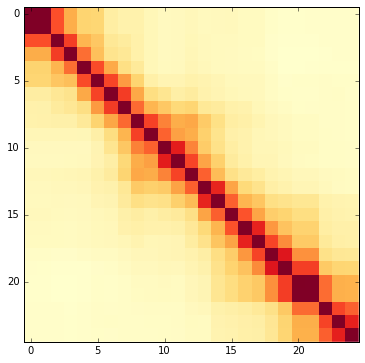

In [21]:
import pylab as plt
plt.figure( figsize=(6,6) )
img = plt.imshow( K, interpolation='none', cmap=plt.get_cmap( 'YlOrRd' ) )
plt.show()

---